In [2]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
df = spark.sql("show databases")
df.show()


+---------+
|namespace|
+---------+
|  default|
+---------+



In [4]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing.csv


{'BostonHousing.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.09378,12

In [5]:
# Read the given CSV file
dataset =spark.read.csv('BostonHousing.csv',inferSchema=True,header='true')

In [6]:
#Show the first 5 elements of your dataset
dataset.limit(5).show()


+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [7]:
#Count the number of observations in the given dataset
dataset.count()

506

In [8]:
# Show the Schema of your dataset
dataset.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [9]:
#Drop the column "b" from your dataset
dataset = dataset.drop("zn")
dataset.printSchema()

root
 |-- crim: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [10]:
#Round all of the numerical columns into two decimal places

from pyspark.sql.functions import round,col,isnan, when, count,rand, randn
for c in dataset.columns:
  dataset =dataset.withColumn(c,round(c,2))
dataset.show(5)

+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+
|crim|indus|chas| nox|  rm| age| dis|rad|tax|ptratio|     b|lstat|medv|
+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+
|0.01| 2.31|   0|0.54|6.58|65.2|4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.03| 7.07|   0|0.47|6.42|78.9|4.97|  2|242|   17.8| 396.9| 9.14|21.6|
|0.03| 7.07|   0|0.47|7.19|61.1|4.97|  2|242|   17.8|392.83| 4.03|34.7|
|0.03| 2.18|   0|0.46| 7.0|45.8|6.06|  3|222|   18.7|394.63| 2.94|33.4|
|0.07| 2.18|   0|0.46|7.15|54.2|6.06|  3|222|   18.7| 396.9| 5.33|36.2|
+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+
only showing top 5 rows



In [11]:

##Create a new column (Age10)  with a 10% increase of 'age' column
age10 = dataset.age * 1.10;
dataset = dataset.withColumn('Age10',age10 )
dataset.show(5)

+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+------------------+
|crim|indus|chas| nox|  rm| age| dis|rad|tax|ptratio|     b|lstat|medv|             Age10|
+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+------------------+
|0.01| 2.31|   0|0.54|6.58|65.2|4.09|  1|296|   15.3| 396.9| 4.98|24.0| 71.72000000000001|
|0.03| 7.07|   0|0.47|6.42|78.9|4.97|  2|242|   17.8| 396.9| 9.14|21.6|             86.79|
|0.03| 7.07|   0|0.47|7.19|61.1|4.97|  2|242|   17.8|392.83| 4.03|34.7| 67.21000000000001|
|0.03| 2.18|   0|0.46| 7.0|45.8|6.06|  3|222|   18.7|394.63| 2.94|33.4|             50.38|
|0.07| 2.18|   0|0.46|7.15|54.2|6.06|  3|222|   18.7| 396.9| 5.33|36.2|59.620000000000005|
+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+------------------+
only showing top 5 rows



In [12]:
#Rounding the new column to 2 decimal points
dataset =dataset.withColumn("Age10",round(dataset["Age10"],2))
dataset.show(5)

+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+-----+
|crim|indus|chas| nox|  rm| age| dis|rad|tax|ptratio|     b|lstat|medv|Age10|
+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+-----+
|0.01| 2.31|   0|0.54|6.58|65.2|4.09|  1|296|   15.3| 396.9| 4.98|24.0|71.72|
|0.03| 7.07|   0|0.47|6.42|78.9|4.97|  2|242|   17.8| 396.9| 9.14|21.6|86.79|
|0.03| 7.07|   0|0.47|7.19|61.1|4.97|  2|242|   17.8|392.83| 4.03|34.7|67.21|
|0.03| 2.18|   0|0.46| 7.0|45.8|6.06|  3|222|   18.7|394.63| 2.94|33.4|50.38|
|0.07| 2.18|   0|0.46|7.15|54.2|6.06|  3|222|   18.7| 396.9| 5.33|36.2|59.62|
+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+-----+
only showing top 5 rows



In [13]:
#MAking sure there are no null/missing values
dataset.select([count(when(isnan(c), c)).alias(c) for c in dataset.columns]).show()
dataset.dtypes

+----+-----+----+---+---+---+---+---+---+-------+---+-----+----+-----+
|crim|indus|chas|nox| rm|age|dis|rad|tax|ptratio|  b|lstat|medv|Age10|
+----+-----+----+---+---+---+---+---+---+-------+---+-----+----+-----+
|   0|    0|   0|  0|  0|  0|  0|  0|  0|      0|  0|    0|   0|    0|
+----+-----+----+---+---+---+---+---+---+-------+---+-----+----+-----+



[('crim', 'double'),
 ('indus', 'double'),
 ('chas', 'int'),
 ('nox', 'double'),
 ('rm', 'double'),
 ('age', 'double'),
 ('dis', 'double'),
 ('rad', 'int'),
 ('tax', 'int'),
 ('ptratio', 'double'),
 ('b', 'double'),
 ('lstat', 'double'),
 ('medv', 'double'),
 ('Age10', 'double')]

(array([0.00185028, 0.        , 0.        , 0.0092514 , 0.00185028,
        0.00555084, 0.00185028, 0.00555084, 0.        , 0.        ,
        0.00185028, 0.00185028, 0.00370056, 0.00555084, 0.00370056,
        0.01110168, 0.00740112, 0.00370056, 0.00370056, 0.01480224,
        0.00185028, 0.00370056, 0.00185028, 0.00185028, 0.00185028,
        0.0092514 , 0.0092514 , 0.00555084, 0.00370056, 0.01480224,
        0.01295196, 0.0092514 , 0.0092514 , 0.00370056, 0.0092514 ,
        0.00740112, 0.00740112, 0.00370056, 0.0092514 , 0.00555084,
        0.01110168, 0.00370056, 0.00370056, 0.00740112, 0.00740112,
        0.00740112, 0.00740112, 0.00555084, 0.00370056, 0.00185028,
        0.00740112, 0.0092514 , 0.01480224, 0.00185028, 0.00370056,
        0.00740112, 0.00555084, 0.01110168, 0.00740112, 0.00185028,
        0.0092514 , 0.0092514 , 0.        , 0.00370056, 0.0092514 ,
        0.00740112, 0.00740112, 0.00740112, 0.00740112, 0.01110168,
        0.00740112, 0.00555084, 0.0092514 , 0.00

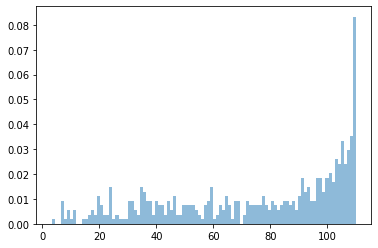

In [14]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#Plot Age10 column on a 2D Plot
num_bins = 50 
plt.hist(np.array(dataset.select("Age10").collect()),density=True,alpha = 0.5,bins = 100)

In [15]:
#Provide Summary Statistics of all columns (count, mean, stddev,min, max)
dataset.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|             indus|              chas|               nox|                rm|               age|               dis|              rad|               tax|           ptratio|                 b|             lstat|              medv|             Age10|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|               506|               506|               506|              506|               

In [16]:
#Convert  Spark Dataframe to Pandas Dataframe
pandas_df = dataset.toPandas()

In [17]:
# Show the last 5 rows of Pandas DataFrame
pandas_df.tail(5)

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,Age10
501,0.06,11.93,0,0.57,6.59,69.1,2.48,1,273,21.0,391.99,9.67,22.4,76.01
502,0.05,11.93,0,0.57,6.12,76.7,2.29,1,273,21.0,396.90,9.08,20.6,84.37
503,0.06,11.93,0,0.57,6.98,91.0,2.17,1,273,21.0,396.90,5.64,23.9,100.10
504,0.11,11.93,0,0.57,6.79,89.3,2.39,1,273,21.0,393.45,6.48,22.0,98.23
505,0.05,11.93,0,0.57,6.03,80.8,2.51,1,273,21.0,396.90,7.88,11.9,88.88


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

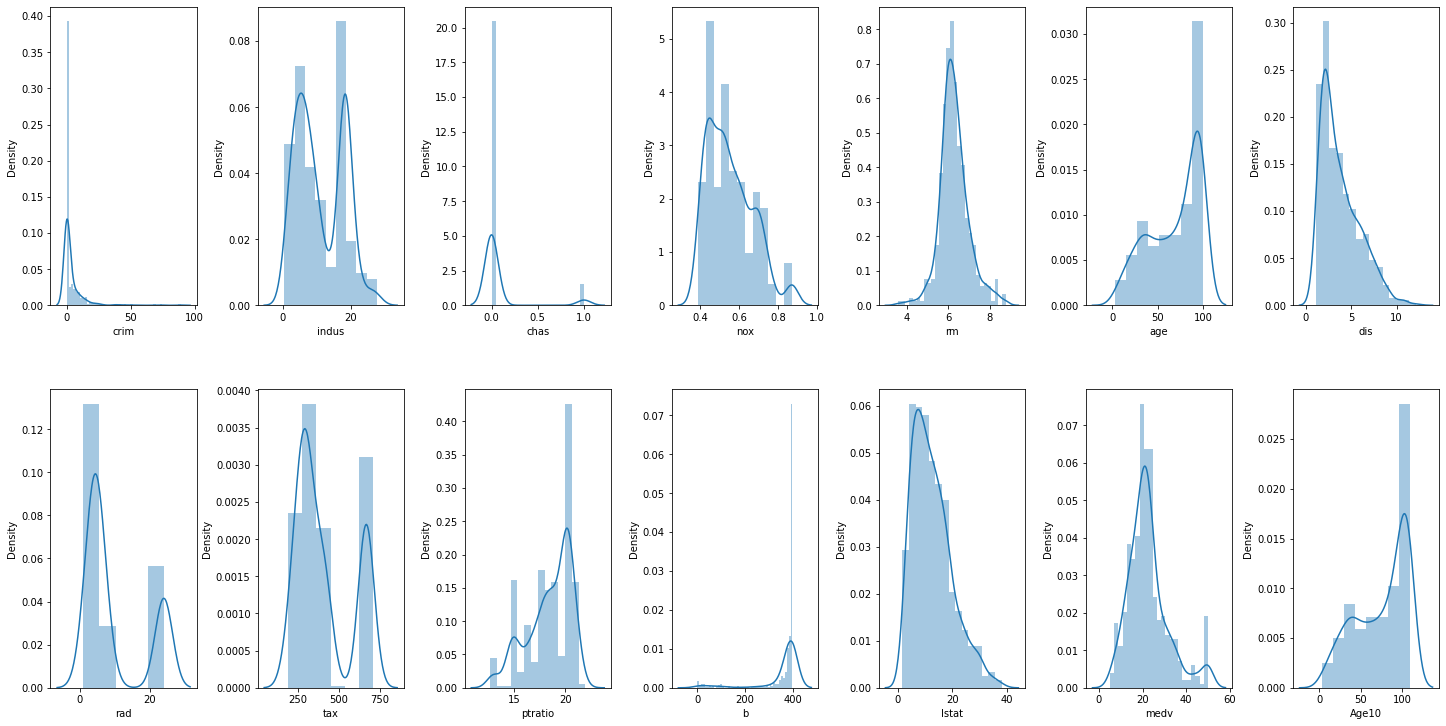

In [19]:
import seaborn as sns
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in pandas_df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

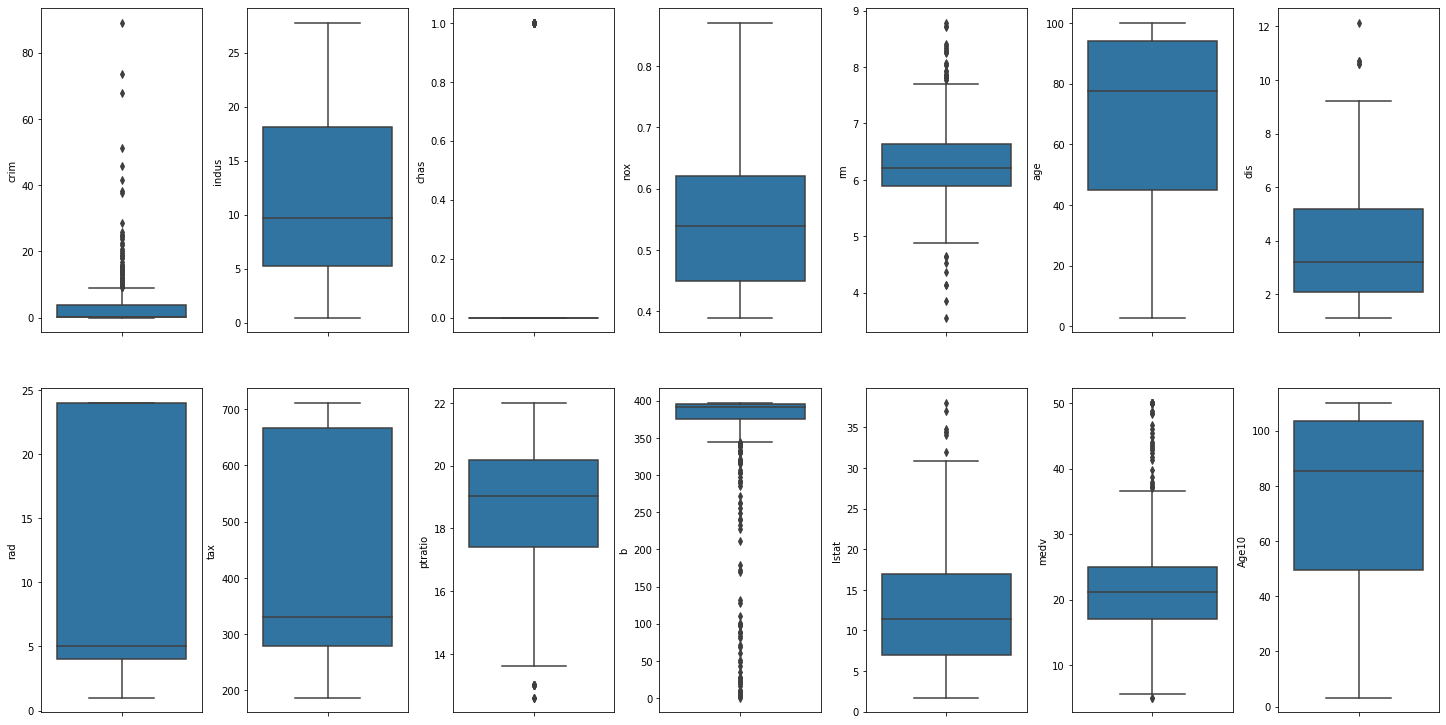

In [21]:
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in pandas_df.items():
    sns.boxplot(y=k, data=pandas_df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)